In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [101]:
## Loading and merging the data_sets
cred_consum_data = pd.read_excel(r"F:\Akash data\AnalytixLabs\Machine Learning\11. Capstone Case Study - Predict Cred Card Consumption\CreditConsumptionData.xlsx")

cust_beha_data = pd.read_excel(r"F:\Akash data\AnalytixLabs\Machine Learning\11. Capstone Case Study - Predict Cred Card Consumption\CustomerBehaviorData.xlsx")

cust_demon = pd.read_excel(r"F:\Akash data\AnalytixLabs\Machine Learning\11. Capstone Case Study - Predict Cred Card Consumption\CustomerDemographics.xlsx")



In [102]:
data = cust_demon.merge(cust_beha_data, on="ID", how="inner")

data = data.merge(cred_consum_data, on="ID", how="inner")

data

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


In [103]:
## displaying basics statistics
summery = data.describe()
print(summery)

                 ID           age  Emp_Tenure_Years  Tenure_with_Bank  \
count  20000.000000  20000.000000      20000.000000      20000.000000   
mean    9999.500000     47.672300         15.217250          5.496050   
std     5773.647028     30.359771         20.481455          2.870452   
min        0.000000     25.000000          0.500000          1.000000   
25%     4999.750000     33.000000          5.100000          3.000000   
50%     9999.500000     40.000000          9.900000          6.000000   
75%    14999.250000     53.000000         18.000000          8.000000   
max    19999.000000    223.000000        203.000000         10.000000   

        region_code  NetBanking_Flag  Avg_days_between_transaction  \
count  19999.000000     20000.000000                  19997.000000   
mean     598.959348         0.718000                     11.044757   
std      220.105230         0.449985                      5.480552   
min      123.000000         0.000000                      2.00

In [104]:
## summery foung that their is the outliers in the age column

(array([3428., 6290., 2036., 2221., 1847., 2251., 1221.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  249.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,  457.]),
 array([ 25. ,  31.6,  38.2,  44.8,  51.4,  58. ,  64.6,  71.2,  77.8,
         84.4,  91. ,  97.6, 104.2, 110.8, 117.4, 124. , 130.6, 137.2,
        143.8, 150.4, 157. , 163.6, 170.2, 176.8, 183.4, 190. , 196.6,
        203.2, 209.8, 216.4, 223. ]),
 <BarContainer object of 30 artists>)

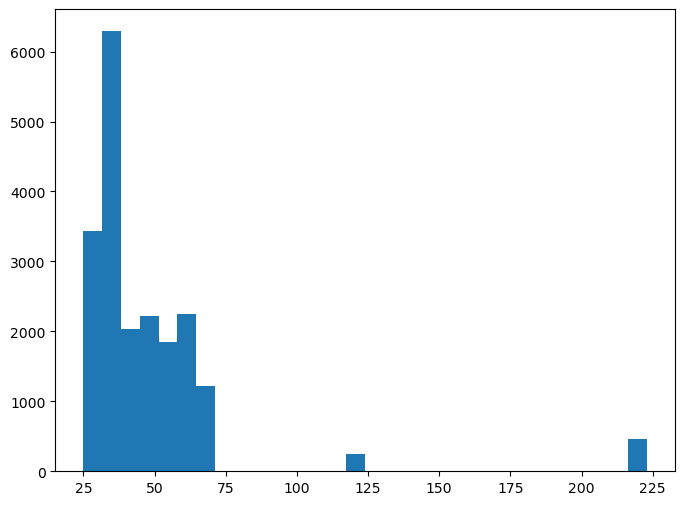

In [105]:
## using histogram to check the vizualization for outliers in the age column
plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30)

In [106]:
## data shows there is some outliers in the age column

In [107]:
## treating outliers using the mean value of the age data
mean_age = data["age"].mean()
mean_age

47.6723

In [108]:
data['age'] = np.where(data["age"]>100, mean_age, data["age"])
data["age"].describe()

count    20000.000000
mean        42.814982
std         12.036643
min         25.000000
25%         33.000000
50%         40.000000
75%         53.000000
max         69.000000
Name: age, dtype: float64

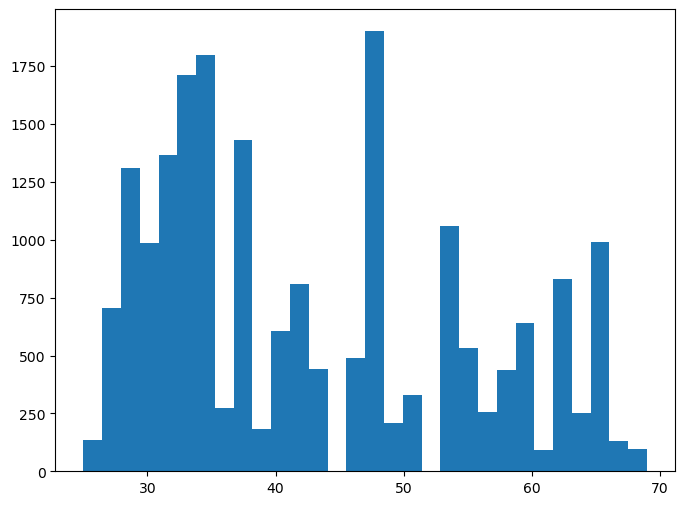

In [109]:
## now again vizualise to see the outlier was removed or not
plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30)
plt.show()

In [110]:
data.dtypes



ID                                int64
account_type                     object
gender                           object
age                             float64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                     float64
NetBanking_Flag                   int64
Avg_days_between_transaction    float64
cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_active              int64
vehicle_loan_active               int64


In [111]:
## count of missing values in each column 

In [112]:
data.isnull().sum()

ID                                 0
account_type                       1
gender                             1
age                                0
Income                             1
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        1
NetBanking_Flag                    0
Avg_days_between_transaction       3
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
i

In [113]:
## removing all the null values 

data = data.dropna()

In [114]:
data.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3  

In [115]:
## encode the categorical variables using one hot encoding 

In [116]:
data = pd.get_dummies(data, columns=['account_type', 'gender', 'Income', 'loan_enq'])

In [117]:
## splitting the model into features and the target variable

In [118]:
X = data.drop(["ID", "cc_cons"], axis=1)
y = data["cc_cons"]

In [119]:
## trian the model 

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [122]:
len(X), len(X_train), len(X_test)

(14995, 10496, 4499)

In [123]:
## building the model 

from sklearn.linear_model import LinearRegression


In [124]:
reg_model = LinearRegression()

In [125]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [126]:
## model evaluation 
y_preds = reg_model.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error

In [128]:
rmspe = np.sqrt(mean_squared_error(y_test, y_preds)) / np.mean(y_test) * 100

In [129]:
print(f'rmspe: {rmspe:.2f}%')


rmspe: 178.62%


In [130]:
## preparing the missing cc_cons customer with missing data
missing_data = cred_consum_data[cred_consum_data["cc_cons"].isna()]

In [131]:
missing_data = pd.merge(missing_data, cust_demon, on="ID")
missing_data = pd.merge(missing_data, cust_beha_data, on="ID")

In [132]:
## encoding categorical variable
missing_data = pd.get_dummies(missing_data, columns=['account_type', 'gender', 'Income', 'loan_enq'])

In [133]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
X_missing_data = imputer.fit_transform(missing_data.drop(["ID", "cc_cons"], axis=1))

In [134]:
## making predictions for missing values 

predictions = reg_model.predict(X_missing_data)


C:\Users\Ganesh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [136]:
predictions_df = missing_data[['ID']].copy()
predictions_df['cc_cons'] = predictions

# Save the predictions to a CSV file
predictions_df.to_csv('PredictedValues.csv', index=False)

In [138]:
file = pd.read_csv(r"F:\Akash data\AnalytixLabs\Machine Learning\11. Capstone Case Study - Predict Cred Card Consumption\final code\PredictedValues.csv")
file

,ID,cc_cons
0,17591,57464.322424
1,13541,62753.394349
2,13431,63823.742238
3,8687,61298.916752
4,14727,60173.882860
...,...,...
4995,12512,51119.506669
4996,14224,59204.024845
4997,18740,56343.219885
4998,18134,56360.947695
